# <Personal Mession - 데이터 분석(5)>

# 1. 데이터 불러오기
- `12_Data.csv` 파일을 불러와 변수 `df1`에 저장합니다.
- **참고:** 이 데이터는 체강 세포 이미지 데이터를 기반으로 하며, 구강 내 암세포(M)와 정상세포(B)의 기하학적 특성을 수치화한 자료입니다.

In [1]:
import pandas as pd
df1 = pd.read_csv("Data/12_Data.csv")
df1.head()

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.3001,0.1471,...,1.0950,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062
1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.0869,0.0702,...,0.5435,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035
2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.1974,0.1279,...,0.7456,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046
3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.2414,0.1052,...,0.4956,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092
4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.1980,0.1043,...,0.7572,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051


# 2. 기술 통계량 확인
- 이름에 "Max"가 포함된 컬럼들의 기술 통계량을 확인합니다.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Image ID             569 non-null    int64  
 1   Diagnosis            569 non-null    object 
 2   Mean Radius          569 non-null    float64
 3   Mean Perimeter       569 non-null    float64
 4   Mean Area            569 non-null    float64
 5   Mean Texture         569 non-null    float64
 6   Mean Smoothness      569 non-null    float64
 7   Mean Compactness     569 non-null    float64
 8   Mean Concavity       569 non-null    float64
 9   Mean Concave Points  569 non-null    float64
 10  Mean Symmetry        569 non-null    float64
 11  Mean Fractal Dim     569 non-null    float64
 12  Max Radius           569 non-null    float64
 13  Max Perimeter        569 non-null    float64
 14  Max Area             569 non-null    float64
 15  Max Texture          569 non-null    flo

In [9]:
cols = list(df1.columns)
df1[cols[12:22]].describe()

,Max Radius,Max Perimeter,Max Area,Max Texture,Max Smoothness,Max Compactness,Max Concavity,Max Concave Points,Max Symmetry,Max Fractal Dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269209,107.261213,880.583128,25.677223,0.132197,0.254253,0.272250,0.114745,0.290316,0.083989
std,4.833217,33.602542,569.356993,6.146258,0.023292,0.157357,0.208666,0.065767,0.062011,0.018185
min,7.930000,50.410000,185.200000,12.020000,0.070000,0.030000,0.000000,0.000000,0.160000,0.060000
25%,13.010000,84.110000,515.300000,21.080000,0.120000,0.150000,0.110000,0.060000,0.250000,0.070000
50%,14.970000,97.660000,686.500000,25.410000,0.130000,0.210000,0.230000,0.100000,0.280000,0.080000
75%,18.790000,125.400000,1084.000000,29.720000,0.150000,0.340000,0.380000,0.160000,0.320000,0.090000
max,36.040000,251.200000,4254.000000,49.540000,0.220000,1.060000,1.250000,0.290000,0.660000,0.210000


# 3. 이상치 개수 계산
- `Mean Radius(세포 평균 반지름)` 값 중, 전체 평균에서 표준편차의 3배 이상 벗어난 데이터의 개수를 구합니다.

In [20]:
outliers = df1[(df1["Mean Radius"] > df1["Mean Radius"].mean() + 3 * df1["Mean Radius"].std()) |
                (df1["Mean Radius"] < df1["Mean Radius"].mean() - 3 * df1["Mean Radius"].std())]
outliers.shape[0]

5

# 4. 가설 검정 1: 진단에 따른 평균 반지름 차이
- `Diagnosis`(진단: 암세포 vs. 정상세포)에 따라 `Mean Radius`의 대표값(예: 평균 또는 중앙값)에 차이가 있는지 가설 검정을 수행합니다.

H0 : Diagnosis(진단: 암세포 vs. 정상세포)에 따라 Mean Radius의 대표값(예: 평균 또는 중앙값)에 차이가 없다  
H1 : Diagnosis에 따라 Mean Radius의 대표값에 차이가 있다

In [21]:
df1["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [27]:
class1 = df1[df1["Diagnosis"] == "M"]["Mean Radius"]
class2 = df1[df1["Diagnosis"] == "B"]["Mean Radius"]

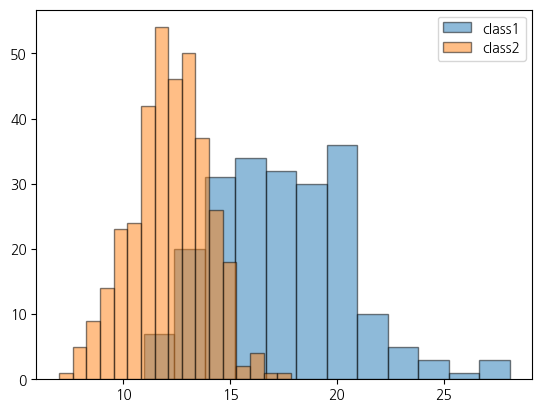

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

plt.hist(class1, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.hist(class2, alpha = 0.5, bins = "auto", edgecolor = "black")
plt.legend(["class1", "class2"])
plt.show()

In [31]:
# 정규성 검정 - 샤피로 윌크 테스트
print(stats.shapiro(class1))
print(stats.shapiro(class2))

# class2는 p > 0.05 => 정규분포 따르나,  class1는 정규분포 따르지 x.

ShapiroResult(statistic=0.9776597278513985, pvalue=0.0018945730576488433)
ShapiroResult(statistic=0.9966646824573794, pvalue=0.6709533998638375)


In [32]:
# 맨 휘트니 U 검정: 두 집단의 중앙값으로 차이 비교

stats.mannwhitneyu(class1, class2)
# p < 0.05  =>  귀무가설 기각. 두 집단의 대표값에 차이가 있다 

MannwhitneyuResult(statistic=70955.0, pvalue=2.6928488423482514e-68)

# 5. 가설 검정 2: 두 변수 간 상관 관계
- `Mean Radius`와 `Mean Smoothness`(세포 평균 곡률/매끄러움 정도) 간의 상관 관계를 검정하고, 상관 계수를 계산합니다.

In [37]:
X = df1["Mean Radius"]
Y = df1["Mean Smoothness"]

ShapiroResult(statistic=0.9410492796418057, pvalue=3.086457095215049e-14)
ShapiroResult(statistic=0.9516884036590084, pvalue=1.0845622190340562e-12)
PearsonRResult(statistic=0.14710904224485516, pvalue=0.00043064807613751486)


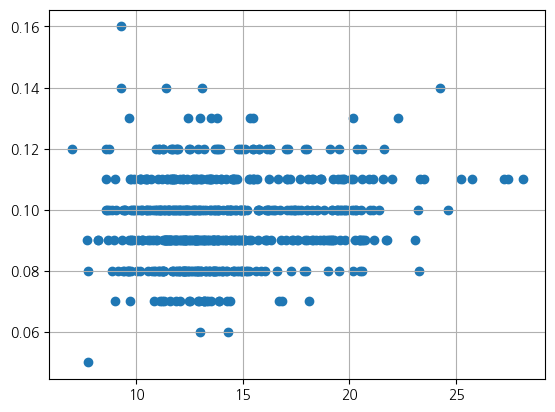

In [38]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import scipy.stats as stats
from scipy.stats import pearsonr

print(stats.shapiro(X))
print(stats.shapiro(Y))

print(pearsonr(X, Y))

plt.scatter(X, Y)
plt.grid()
plt.show()

# shapiro 결과 ; 둘다 0.05보다 크므로 정규성을 띤다
# pearson 결과 ; 두 변수 간 상관관계가 없고(상관계수 0.15), 유의성을 따른다 

In [41]:
from scipy.stats import spearmanr

print(spearmanr(X, Y))

# spearman 결과 ; 두 변수 간 상관관계가 없고(상관계수 0.13), 유의성을 따른다 

SignificanceResult(statistic=0.125935259003714, pvalue=0.002617573533346598)


# 6. 정규성 검정 및 시각화
- 이름에 'Mean'이 포함된 모든 컬럼에 대해 정규성 검정을 실시합니다.
- 정규분포를 따르는 컬럼들을 대상으로 히스토그램을 시각화합니다

In [47]:
mean_cols = [col for col in df1.columns if 'Mean' in col]
mean_cols

['Mean Radius',
 'Mean Perimeter',
 'Mean Area',
 'Mean Texture',
 'Mean Smoothness',
 'Mean Compactness',
 'Mean Concavity',
 'Mean Concave Points',
 'Mean Symmetry',
 'Mean Fractal Dim']

In [48]:
normal_cols = []
for col in mean_cols:
    stat, p = shapiro(df1[col])
    print(f"{col}: p-value = {p:.4f}")
    if p > 0.05:
        normal_cols.append(col)

# 이름에 'Mean'이 포함된 칼럼들 중 정규분포를 따르는 칼럼이 존재하지 않음.

Mean Radius: p-value = 0.0000
Mean Perimeter: p-value = 0.0000
Mean Area: p-value = 0.0000
Mean Texture: p-value = 0.0000
Mean Smoothness: p-value = 0.0000
Mean Compactness: p-value = 0.0000
Mean Concavity: p-value = 0.0000
Mean Concave Points: p-value = 0.0000
Mean Symmetry: p-value = 0.0000
Mean Fractal Dim: p-value = 0.0000


# 7. 분류 모델 생성 & 8. 모델 성능 평가
- **목표:** 세포의 기하학적 특성을 입력받아 암세포와 정상세포를 분류하는 성능 좋은 모델 생성
- **입력 변수(X):** 이름에 'Mean'이 포함된 모든 컬럼
- **목표 변수(Y):** `Diagnosis`
- **알고리즘:** 분류 모델
- **데이터 분할:** 학습 데이터와 검증 데이터의 비율을 75% : 25%로 분리
- **모델 저장:** 생성한 모델을 `model_cell.sav`로 저장

- Accuracy, Recall, Precision, F1 Score 등 다양한 지표를 활용하여 분류 모델의 성능을 평가합니다.

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

mean_cols = [col for col in df1.columns if 'Mean' in col]
X = df1[mean_cols]
Y = LabelEncoder().fit_transform(df1['Diagnosis'])  # M=1, B=0

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_x, test_x, train_y, test_y = train_test_split(X_scaled, Y, test_size=0.25, random_state=42, stratify=Y)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = []
best_model = None
best_score = 0

# 교차검증 결과
for name, model in models.items():
    scores = cross_val_score(model, train_x, train_y, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"{name}: 평균 정확도 = {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model

    results.append({'Model': name, 'Accuracy': mean_score})

LogisticRegression: 평균 정확도 = 0.9342
RandomForest: 평균 정확도 = 0.9483
XGBoost: 평균 정확도 = 0.9436
SVM: 평균 정확도 = 0.9342
KNN: 평균 정확도 = 0.9460


In [81]:
best_model.fit(train_x, train_y)
pred = best_model.predict(test_x)

# 테스트셋 평가 결과
print("Accuracy:", accuracy_score(test_y, pred))
print("F1 Score:", f1_score(test_y, pred))

Accuracy: 0.9300699300699301
F1 Score: 0.9019607843137255


              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95        90
   Malignant       0.94      0.87      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



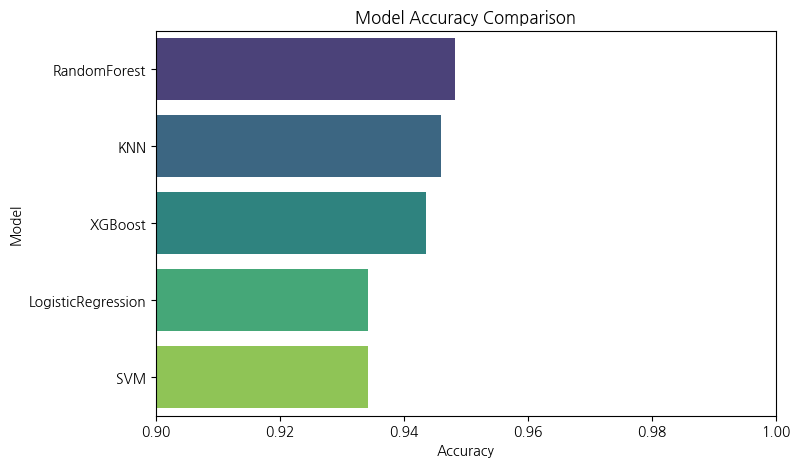

['model_cell.sav']

In [82]:
# Classification Report
print(classification_report(test_y, pred, target_names=['Benign', 'Malignant']))

df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)
plt.show()

joblib.dump(best_model, 'model_cell.sav')

In [83]:
from sklearn.metrics import precision_score, recall_score

print("Accuracy :", accuracy_score(test_y, pred))
print("Precision:", precision_score(test_y, pred))
print("Recall   :", recall_score(test_y, pred))
print("F1 Score :", f1_score(test_y, pred))

Accuracy : 0.9300699300699301
Precision: 0.9387755102040817
Recall   : 0.8679245283018868
F1 Score : 0.9019607843137255


# 9. Precision-Recall Curve 시각화 및 최적 Threshold 계산
- 분류 모델의 Precision과 Recall Curve를 시각화합니다.
- 이를 통해 최적의 Threshold 값을 산출합니다.

In [84]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

if hasattr(best_model, "predict_proba"):
    pred_proba = best_model.predict_proba(test_x)[:, 1]
else:
    pred_proba = best_model.decision_function(test_x)

# Precision-Recall
precision, recall, thresholds = precision_recall_curve(test_y, pred_proba)

# F1
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"최적 Threshold: {best_threshold:.4f}")
print(f"최고 F1 Score: {max(f1_scores):.4f}")

최적 Threshold: 0.4300
최고 F1 Score: 0.9333


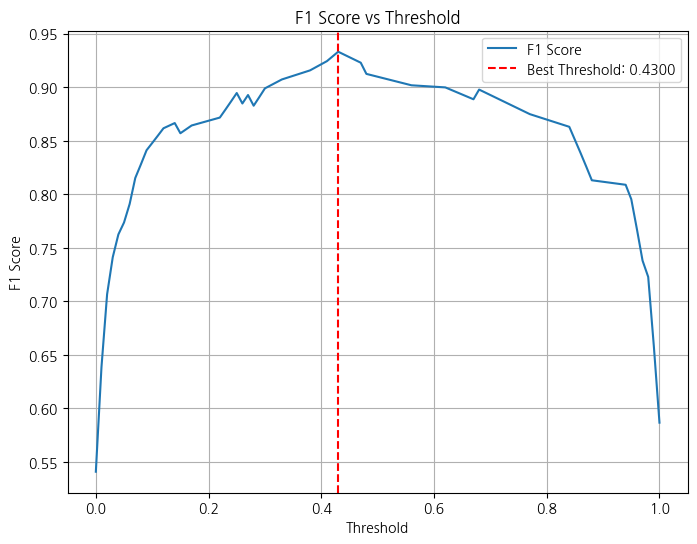

In [85]:
# F1 vs Threshold 그래프
plt.figure(figsize=(8,6))
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Best Threshold: {best_threshold:.4f}")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid()
plt.show()

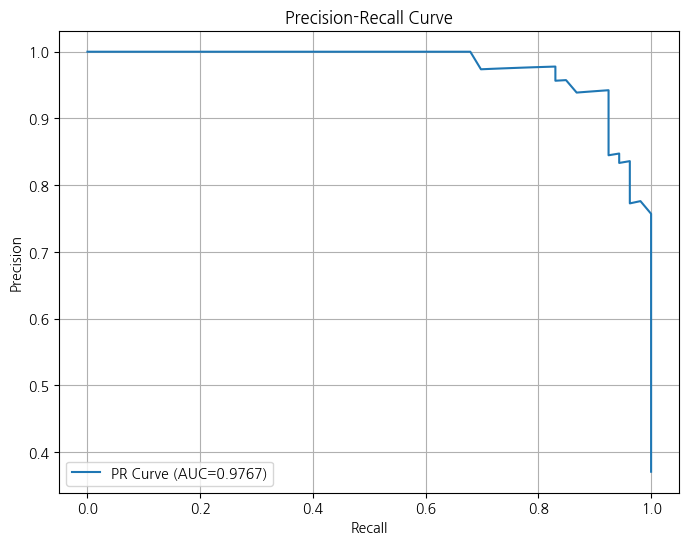

In [86]:
# Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"PR Curve (AUC={auc(recall, precision):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# 10. ROC 곡선 및 AUC 계산
- 앞서 계산한 최적의 Threshold를 적용하여 테스트 셋을 분류합니다.
- ROC 곡선을 시각화하고 AUC 값을 계산하여 모델의 성능을 최종 평가합니다.

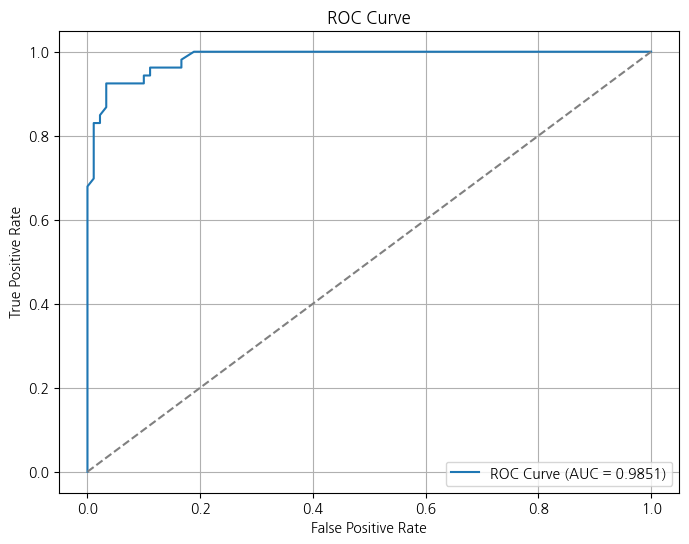

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_opt = (pred_proba >= best_threshold).astype(int)

# ROC Curve
fpr, tpr, _ = roc_curve(test_y, pred_proba)
roc_auc = roc_auc_score(test_y, pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [88]:
# 최적 Threshold 적용 후 성능
print("Accuracy :", accuracy_score(test_y, pred_opt))
print("Precision:", precision_score(test_y, pred_opt))
print("Recall   :", recall_score(test_y, pred_opt))
print("F1 Score :", f1_score(test_y, pred_opt))
print("ROC AUC  :", roc_auc)

Accuracy : 0.951048951048951
Precision: 0.9423076923076923
Recall   : 0.9245283018867925
F1 Score : 0.9333333333333333
ROC AUC  : 0.9851153039832284
